## Instalação do pandasql

Nesta etapa instalamos o pacote **pandasql**, que permite executar comandos SQL diretamente sobre DataFrames do pandas.  

Isso é útil porque o teste técnico da Méliuz recomenda o uso de SQL para análise dos dados, e o `pandasql` nos dá uma forma prática de aplicar consultas SQL sem precisar subir um banco de dados separado.

Com ele, podemos escrever consultas como `SELECT * FROM clientes WHERE estado = 'SP'` diretamente no notebook, mantendo o fluxo de análise simples e transparente.

A instalação é feita apenas uma vez e garante que o ambiente esteja pronto para as próximas etapas.


In [12]:
!pip install pandasql

## Imports iniciais e configuração do ambiente

Nesta célula importamos todas as bibliotecas essenciais do projeto:

- **pandas** para manipulação de dados  
- **numpy** para operações numéricas  
- **matplotlib** para visualização  
- **pandasql (sqldf)** para executar consultas SQL nos DataFrames  
- Configurações visuais do pandas e matplotlib para melhorar a legibilidade dos outputs

Esses imports estruturam nosso ambiente de análise e garantem que as ferramentas necessárias estejam carregadas antes de iniciarmos a exploração dos dados.


In [3]:
# ============================
#   IMPORTS INICIAIS
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pandasql para permitir SQL
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Configurações visuais
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

print("Ambiente carregado com sucesso!")


Ambiente carregado com sucesso!


## Carregamento dos arquivos CSV

Aqui realizamos o carregamento dos quatro arquivos disponibilizados no teste técnico:

- `clientes.csv`  
- `pedidos.csv`  
- `produtos.csv`  
- `itens_pedido.csv`

Esses arquivos representam a base completa do teste A/B/C, contendo informações sobre clientes, pedidos, produtos e itens vendidos.

O carregamento é feito com `pandas.read_csv()`, permitindo que os dados sejam manipulados diretamente em DataFrames.  
Após carregar, validamos que não houve erro e que todas as tabelas estão acessíveis para as próximas etapas.


In [4]:
# ============================
#   CARREGAMENTO DOS DADOS
# ============================

clientes = pd.read_csv("clientes.csv")
pedidos = pd.read_csv("pedidos.csv")
produtos = pd.read_csv("produtos.csv")
itens = pd.read_csv("itens_pedido.csv")

print("Arquivos carregados!")


Arquivos carregados!


## Visualização inicial da tabela de clientes

Exibimos as cinco primeiras linhas do DataFrame `clientes` utilizando o método `head()`.

Este passo é importante para:

- Conferir se o arquivo foi carregado corretamente  
- Validar as colunas existentes  
- Visualizar formatos iniciais (ex.: datas, strings, IDs)  
- Ter uma percepção geral da estrutura dos dados

Essa visualização rápida ajuda a detectar inconsistências óbvias e a se familiarizar com o dataset antes de iniciar a análise formal.


In [5]:
clientes.head()

,cliente_id,nome,email,data_cadastro,cidade,estado,grupo
0,12414,Pedro Lucas Almeida,pintogabriela@example.net,2022-09-17,Maranhao,SE,A
1,77301,João Miguel Jesus,stephany90@example.com,2021-11-17,Rio,AL,A
2,40685,Antônio Viana,lda-cunha@example.com,2021-11-18,Maranhão,RS,C
3,27481,Ana Luiza da Conceição,cardosomaria-julia@example.net,2024-06-11,Sao Paulo,DF,C
4,47354,Arthur Gomes,luiz-otaviocampos@example.com,2021-08-12,Goiania,MG,C


## Análise da estrutura dos DataFrames (info)

Nesta célula utilizamos o método `info()` para inspecionar a estrutura de todos os DataFrames:

- Tipos de dados (`dtype`)  
- Quantidade de registros  
- Presença de valores nulos  
- Consistência entre as tabelas

Este diagnóstico inicial é essencial para identificar:

- Colunas que precisam ser convertidas para datas  
- Campos numéricos que estão como string  
- Possíveis nulos que exigem tratamento  
- Restrições e validações antes do início da análise estatística

Com essas informações, definimos os ajustes necessários para preparar os dados.


In [6]:
print("CLIENTES:")
print(clientes.info(), "\n")

print("PEDIDOS:")
print(pedidos.info(), "\n")

print("PRODUTOS:")
print(produtos.info(), "\n")

print("ITENS DO PEDIDO:")
print(itens.info(), "\n")

CLIENTES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cliente_id     1200 non-null   int64 
 1   nome           1200 non-null   object
 2   email          1200 non-null   object
 3   data_cadastro  1200 non-null   object
 4   cidade         1200 non-null   object
 5   estado         1200 non-null   object
 6   grupo          1200 non-null   object
dtypes: int64(1), object(6)
memory usage: 65.8+ KB
None 

PEDIDOS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pedido_id    10000 non-null  int64 
 1   cliente_id   10000 non-null  int64 
 2   data_pedido  10000 non-null  object
 3   status       10000 non-null  object
 4   valor_total  10000 non-null  int64 
dtypes: int64(3), object(2)
memory u

## Conversão de colunas de datas para formato datetime

Algumas colunas essenciais, como `data_cadastro` e `data_pedido`, foram carregadas como texto (`object`).  
Para que possamos realizar análises temporais (ex.: evolução mensal, sazonalidade, recência), é fundamental convertê-las para o tipo `datetime`.

Utilizamos `pd.to_datetime()` para realizar essa transformação com segurança, utilizando `errors='coerce'` para tratar automaticamente valores inválidos.

Após esta etapa, as datas passam a se comportar corretamente em operações como filtragem, ordenação e agrupamento por período.


In [7]:
# ============================
#   AJUSTES INICIAIS
#   Conversão de datas
# ============================

clientes['data_cadastro'] = pd.to_datetime(clientes['data_cadastro'], errors='coerce')
pedidos['data_pedido'] = pd.to_datetime(pedidos['data_pedido'], errors='coerce')

print("Datas convertidas com sucesso!")


Datas convertidas com sucesso!


## Análise do desempenho dos grupos A/B/C

O objetivo desta etapa é avaliar o comportamento dos três grupos do teste (A, B e C) com base
nos dados reais de pedidos e clientes, identificando qual grupo apresenta melhor performance
e, portanto, deve ser recomendado como funcionalidade oficial.

Para isso, calculamos as principais métricas por grupo:

- **Quantidade de clientes**  
- **Quantidade de pedidos**  
- **Taxa de conversão**  
- **Receita total**  
- **Ticket médio por pedido**  
- **Receita média por cliente (ARPU)**  
- **Distribuição dos status dos pedidos**

Essas métricas juntas fornecem uma visão completa da performance de cada grupo,
permitindo comparar conversão, engajamento e valor gerado.

Na próxima célula, realizamos a junção das tabelas e calculamos todas as métricas.


In [16]:
# ============================
#   ANÁLISE DO TESTE A/B/C
# ============================

# 1. Juntar clientes e pedidos (inner join pelo cliente_id)
clientes_pedidos = pedidos.merge(clientes, on="cliente_id", how="left")

# 2. Quantidade de clientes por grupo
clientes_por_grupo = clientes.groupby("grupo")["cliente_id"].nunique()

# 3. Quantidade de pedidos por grupo
pedidos_por_grupo = clientes_pedidos.groupby("grupo")["pedido_id"].nunique()

# 4. Taxa de conversão (clientes que fizeram pedido / total do grupo)
clientes_com_pedido = clientes_pedidos.groupby("grupo")["cliente_id"].nunique()
taxa_conversao = (clientes_com_pedido / clientes_por_grupo).round(3)

# 5. Receita total por grupo
receita_total = clientes_pedidos.groupby("grupo")["valor_total"].sum().round(2)

# 6. Ticket médio dos pedidos
ticket_medio = clientes_pedidos.groupby("grupo")["valor_total"].mean().round(2)

# 7. Receita média por cliente (ARPU)
arpu = (receita_total / clientes_por_grupo).round(2)

# 8. Tabela consolidada
tabela_grupos = pd.DataFrame({
    "Clientes": clientes_por_grupo,
    "Clientes com Pedido": clientes_com_pedido,
    "Taxa de Conversão": taxa_conversao,
    "Pedidos": pedidos_por_grupo,
    "Receita Total": receita_total,
    "Ticket Médio": ticket_medio,
    "ARPU (Receita por Cliente)": arpu
})

tabela_grupos


,Clientes,Clientes com Pedido,Taxa de Conversão,Pedidos,Receita Total,Ticket Médio,ARPU (Receita por Cliente)
grupo,,,,,,,
A,413,413,1.0,3440,10110723,2939.16,24481.17
B,398,398,1.0,3267,11070687,3388.64,27815.80
C,389,389,1.0,3293,10358584,3145.64,26628.75


## Conclusão do Teste A/B/C

A análise das métricas dos três grupos (A, B e C) demonstra que o **Grupo B** apresentou a
melhor performance geral e, portanto, representa a configuração mais eficiente do teste.

Mesmo possuindo uma quantidade de clientes semelhante aos demais grupos, o Grupo B se
destaca em todas as métricas relevantes para o negócio:

- **Maior ticket médio por pedido**  
- **Maior receita total do período analisado**  
- **Maior ARPU (Receita Média por Cliente)**  
- **Número de pedidos competitivo em relação aos demais grupos**

Estas evidências mostram que os usuários expostos à variante do Grupo B tendem a gerar
mais valor por transação e apresentam comportamento de compra mais forte.

Além disso, como a taxa de conversão foi igual entre os três grupos, a diferença de
performance se dá exclusivamente pelo **valor gerado**, e não pelo volume de clientes
engajados.

### ✅ Grupo recomendado para implementação: **Grupo B**
O Grupo B deve ser escolhido como a versão oficial, pois maximiza a receita e demonstra o
maior impacto positivo no comportamento de compra dos usuários.


## Pergunta 2 — O estado do usuário influencia no valor das vendas?

Nesta etapa analisamos se o estado de residência dos clientes impacta o valor das vendas.
Para isso, unimos os dados de clientes e pedidos e calculamos, por estado:

- Quantidade de pedidos
- Receita total
- Ticket médio
- Receita média por cliente (ARPU)

Com essas métricas, é possível identificar estados com comportamento de compra acima ou abaixo da média, e verificar se a variável geográfica influencia diretamente o desempenho de vendas.


In [17]:
# ============================
#   PERGUNTA 2 — ESTADO x VENDAS
# ============================

# Juntar clientes e pedidos
df_estado = pedidos.merge(clientes, on="cliente_id", how="left")

# Número de pedidos por estado
pedidos_estado = df_estado.groupby("estado")["pedido_id"].nunique()

# Receita total por estado
receita_estado = df_estado.groupby("estado")["valor_total"].sum().round(2)

# Ticket médio por estado
ticket_estado = df_estado.groupby("estado")["valor_total"].mean().round(2)

# ARPU por estado
clientes_estado = df_estado.groupby("estado")["cliente_id"].nunique()
arpu_estado = (receita_estado / clientes_estado).round(2)

# Consolidar
tabela_estado = pd.DataFrame({
    "Clientes": clientes_estado,
    "Pedidos": pedidos_estado,
    "Receita Total": receita_estado,
    "Ticket Médio": ticket_estado,
    "ARPU (por cliente)": arpu_estado
}).sort_values("Receita Total", ascending=False)

tabela_estado


,Clientes,Pedidos,Receita Total,Ticket Médio,ARPU (por cliente)
estado,,,,,
RR,55,484,1473796,3045.03,26796.29
MG,51,462,1456938,3153.55,28567.41
MA,50,431,1384391,3212.04,27687.82
AL,48,410,1359426,3315.67,28321.38
GO,50,434,1354592,3121.18,27091.84
TO,47,394,1269645,3222.45,27013.72
PA,47,406,1259798,3102.95,26804.21
ES,53,399,1253099,3140.60,23643.38
AP,50,402,1238600,3081.09,24772.00


## Conclusão — O estado do usuário influencia no valor das vendas?

Sim. A análise demonstra de forma clara que o estado de residência do cliente influencia
significativamente no valor das vendas.

Ao comparar os estados, observamos diferenças consistentes em todas as métricas analisadas:

- **Receita total**
- **Ticket médio**
- **Receita média por cliente (ARPU)**
- **Número de pedidos**

Estados como **RR, MG, MA, AL e GO** apresentam desempenho muito acima da média,
com tickets entre R$ 3.100 e R$ 3.300 e ARPU superior a R$ 26 mil.  

Já estados como **RS, RN e PB** aparecem nas últimas posições, com ticket médio e ARPU
bem menores.

Essas diferenças indicam que o fator geográfico exerce impacto direto no comportamento de
compra. A empresa pode explorar esse achado para campanhas regionais, personalização de
ofertas e otimização de estratégias comerciais por estado.


## Pergunta 3 — Quais estados e cidades mais vendem?

Nesta etapa identificamos quais estados e cidades apresentam o maior volume de vendas,
medido pela **receita total**. A compreensão desses rankings é essencial para direcionar
estratégias comerciais, campanhas regionais e decisões relacionadas à logística e expansão.

Para isso, unimos as tabelas de clientes e pedidos e calculamos:

- Receita total por estado
- Receita total por cidade
- Ordenação decrescente do valor gerado

Na célula abaixo, realizamos os agrupamentos e exibimos os rankings finais.


In [18]:
# ============================
#   PERGUNTA 3 — RANKING ESTADOS E CIDADES
# ============================

# Reutilizando df_estado (clientes + pedidos)
df_estado = pedidos.merge(clientes, on="cliente_id", how="left")

# ---------- ESTADOS ----------
ranking_estados = (
    df_estado.groupby("estado")["valor_total"]
    .sum()
    .round(2)
    .sort_values(ascending=False)
)

# ---------- CIDADES ----------
ranking_cidades = (
    df_estado.groupby("cidade")["valor_total"]
    .sum()
    .round(2)
    .sort_values(ascending=False)
)

print("Ranking de Estados (Receita Total):")
display(ranking_estados)

print("\nRanking de Cidades (Receita Total):")
display(ranking_cidades)


Ranking de Estados (Receita Total):


estado
RR    1473796
MG    1456938
MA    1384391
AL    1359426
GO    1354592
TO    1269645
PA    1259798
ES    1253099
AP    1238600
AM    1226854
SE    1222707
RJ    1221962
MT    1204402
DF    1194352
SC    1167493
PR    1106404
SP    1099359
AC    1097683
MS    1051271
RO    1046045
BA    1042334
PI    1038227
CE    1005333
PE     998885
RS     942658
RN     920391
PB     903349
Name: valor_total, dtype: int64


Ranking de Cidades (Receita Total):


cidade
sao Paulo         6875247
Sao Paulo         4308955
São Paulo         2546544
Maranhao          2477383
Curitiba          2435995
Belo Horizonte    2307351
Goiania           2210169
Rio de Janeiro    2208711
Rio               2208226
Goiânia           2064080
Maranhão          1897333
Name: valor_total, dtype: int64

## Conclusão — Estados e cidades que mais vendem

A análise de receita total por estado e cidade mostra que existe forte concentração regional
no volume de vendas.

### 🔹 Estados com maior receita
Os estados com maior faturamento são:

1. **Roraima (RR)**  
2. **Minas Gerais (MG)**  
3. **Maranhão (MA)**  
4. **Alagoas (AL)**  
5. **Goiás (GO)**  

Esses estados apresentam volumes de vendas bem acima da média, reforçando que o fator
geográfico exerce influência significativa sobre o comportamento de compra.

Estados como **RS**, **RN** e **PB** aparecem nas últimas posições, com receita
substancialmente menor.

---

### 🔹 Cidades com maior receita

A cidade que mais gera receita é **São Paulo**, aparecendo duas vezes devido à diferença de
grafia (“Sao Paulo” e “São Paulo”), mas somando **o maior volume absoluto de vendas** do país.

Outras cidades relevantes incluem:

- **Maranhão**  
- **Curitiba**  
- **Belo Horizonte**  
- **Goiânia**  
- **Rio de Janeiro**

Esses polos urbanos concentram a maior parte das compras, indicando onde campanhas,
investimentos e ofertas personalizadas podem ter maior impacto.

---

**Conclusão geral:** há clara concentração de receita em determinadas regiões, especialmente
em São Paulo e em estados específicos do Norte, Nordeste e Sudeste. Esses padrões oferecem
insights importantes para estratégias comerciais e segmentação geográfica.


## Pergunta 4 — A categoria do produto ou a quantidade de itens influencia o status do pedido?

Nesta etapa investigamos se fatores relacionados aos produtos impactam o status final dos
pedidos. Em particular, buscamos responder:

- Categorias de produtos possuem maior incidência de cancelamentos ou devoluções?
- Pedidos com maior quantidade de itens apresentam maior taxa de problemas?
  
Para isso, unimos as tabelas de pedidos, itens e produtos, permitindo:

- Calcular o volume de itens por pedido  
- Avaliar o status dos pedidos por categoria  
- Verificar padrões ou tendências que possam indicar influência direta desses fatores

A célula abaixo realiza a preparação dos dados e gera as tabelas de análise.


In [19]:
# ============================
#   PERGUNTA 4 — CATEGORIA x STATUS
# ============================

# 1. Juntar pedidos + itens + produtos
df_cat = (
    pedidos
    .merge(itens, on="pedido_id", how="left")
    .merge(produtos, on="produto_id", how="left")
)

# 2. Agrupar por categoria e status
categoria_status = (
    df_cat
    .groupby(["categoria", "status"])["pedido_id"]
    .nunique()
    .unstack(fill_value=0)
)

# Percentual por categoria
categoria_status_pct = (
    categoria_status
    .div(categoria_status.sum(axis=1), axis=0)
    .round(3)
)

# 3. Quantidade total de itens por pedido
qtd_itens = df_cat.groupby("pedido_id")["quantidade"].sum()

# Juntar com status
df_qtd_status = pedidos.merge(qtd_itens, on="pedido_id", how="left")

# Criar faixas de quantidade
df_qtd_status["faixa_qtd"] = pd.cut(
    df_qtd_status["quantidade"],
    bins=[0, 2, 5, 10, 20, 100],
    labels=["1-2", "3-5", "6-10", "11-20", "21+"],
    right=True
)

# Agrupar por faixa e status
faixa_status = (
    df_qtd_status
    .groupby(["faixa_qtd", "status"])["pedido_id"]
    .nunique()
    .unstack(fill_value=0)
)

# Percentual por faixa
faixa_status_pct = (
    faixa_status
    .div(faixa_status.sum(axis=1), axis=0)
    .round(3)
)

categoria_status_pct, faixa_status_pct


(status       CANCELADO  Confirmado  Pending
 categoria                                  
 Alimentos        0.163       0.681    0.156
 Brinquedos       0.153       0.682    0.165
 Decoraçao        0.176       0.656    0.168
 Decoração        0.159       0.667    0.174
 Eletronicos      0.169       0.661    0.170
 Eletrônicos      0.164       0.670    0.166
 Esportes         0.162       0.665    0.173
 Livros           0.167       0.669    0.164
 Roupas           0.171       0.658    0.170,
 status     CANCELADO  Confirmado  Pending
 faixa_qtd                                
 1-2            0.178       0.670    0.152
 3-5            0.176       0.654    0.170
 6-10           0.164       0.667    0.169
 11-20          0.154       0.682    0.164
 21+              NaN         NaN      NaN)

## Conclusão — A categoria do produto ou a quantidade de itens influencia o status do pedido?

Os resultados mostram que **nem a categoria do produto nem a quantidade total de itens do
pedido têm impacto significativo sobre o status final (confirmado, cancelado ou pendente).**

### 🔹 Categoria × Status
As taxas de cancelamento e confirmação são muito semelhantes entre todas as categorias
analisadas:

- Cancelamentos variam apenas entre **15% e 17%**
- Confirmações ficam entre **66% e 68%**
- Pedidos pendentes seguem o mesmo padrão

Não há nenhuma categoria que apresente comportamento fora da curva ou risco operacional.

---

### 🔹 Quantidade de Itens × Status
As diferentes faixas de quantidade de itens por pedido também apresentam comportamento
muito similar:

- Pedidos com poucos itens (1–2) ou muitos itens (11–20) têm **índices de cancelamento quase idênticos**
- A confirmação dos pedidos permanece estável em todas as faixas (≈ 65% a 68%)

Isso indica que o volume de itens no carrinho **não aumenta a probabilidade de cancelamento**
ou falha no processamento.

---

### ✔️ Conclusão Final
**Não foram identificados padrões que indiquem influência da categoria ou da quantidade de
itens sobre o status dos pedidos.**  
Os resultados sugerem que fatores externos à composição do pedido (ex.: pagamento, cliente ou logística)
são mais determinantes no sucesso ou falha das transações.


## Pergunta 5 — Outras métricas relevantes

Para complementar a análise e agregar profundidade ao estudo, trouxemos três métricas
adicionais que ajudam a entender melhor o comportamento de vendas e o perfil dos pedidos.
Essas análises extra permitem observar padrões globais, sazonalidade e concentração de
produtos.

As métricas complementares são:

### 1. Distribuição geral do status dos pedidos  
Avalia se há predominância de pedidos confirmados, cancelados ou pendentes, o que pode
indicar estabilidade ou possíveis gargalos operacionais.

### 2. Ticket médio mensal  
Permite observar sazonalidade e a evolução do valor médio dos pedidos ao longo do tempo.

### 3. Top 10 produtos mais vendidos  
Ajuda a identificar quais itens representam maior volume de vendas e como o portfólio se
distribui entre produtos de alta demanda.


In [21]:
# ============================
#   PERGUNTA 5 — MÉTRICAS EXTRAS
# ============================

# 1. Distribuição dos status (geral)
status_dist = (
    pedidos["status"]
    .value_counts(normalize=True)
    .round(3)
)

# 2. Ticket médio mensal
pedidos["mes"] = pedidos["data_pedido"].dt.to_period("M")
ticket_mensal = (
    pedidos.groupby("mes")["valor_total"]
    .mean()
    .round(2)
)

# 3. Top 10 produtos mais vendidos
df_prod = itens.merge(produtos, on="produto_id", how="left")
top_produtos = (
    df_prod.groupby("produto_id")["quantidade"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

status_dist, ticket_mensal, top_produtos


(status
 Confirmado    0.665
 CANCELADO     0.168
 Pending       0.167
 Name: proportion, dtype: float64,
 mes
 2023-07    3632.66
 2023-08    3134.46
 2023-09    3334.82
 2023-10    3169.01
 2023-11    3195.48
 2023-12    2978.25
 2024-01    3148.89
 2024-02    3142.54
 2024-03    3213.04
 2024-04    3183.82
 2024-05    3139.77
 2024-06    3179.62
 2024-07    3034.12
 2024-08    3267.15
 2024-09    3013.25
 2024-10    3160.96
 2024-11    3254.27
 2024-12    3043.72
 2025-01    3102.35
 2025-02    3156.88
 2025-03    3262.57
 2025-04    3196.85
 2025-05    3161.83
 2025-06    3167.49
 2025-07    3014.37
 Freq: M, Name: valor_total, dtype: float64,
 produto_id
 6808    181
 8376    178
 1320    173
 4719    172
 9910    171
 5764    169
 3825    167
 2151    167
 4510    162
 2263    162
 Name: quantidade, dtype: int64)

## Pergunta 5 — Outras métricas relevantes

Para complementar o estudo e trazer uma visão mais ampla do comportamento das vendas,
realizamos três análises adicionais que ajudam a identificar padrões globais, sazonalidade
e concentração de demanda por produto.

Essas métricas agregam profundidade ao diagnóstico e ajudam a entender fatores que não
estavam explicitamente nas perguntas anteriores, mas que são essenciais em decisões analíticas.

---

## 1. Distribuição geral do status dos pedidos

A distribuição dos status é a seguinte:

- **Confirmado:** 66.5%  
- **Cancelado:** 16.8%  
- **Pendente:** 16.7%

### 🔎 Interpretação

- O sistema apresenta um **alto nível de sucesso operacional**, com 2/3 dos pedidos sendo confirmados.
- A proporção de cancelamentos e pendências é equilibrada, indicando que não existe gargalo crítico evidente.
- Esses valores também são consistentes com as análises por categoria e quantidade de itens, reforçando a estabilidade do fluxo de pedidos.

---

## 2. Ticket médio mensal

Ao analisar o ticket médio ao longo do tempo, observamos:

- Valores oscilando entre **R$ 2.900  e  R$ 3.600**.
- Não há quedas abruptas nem saltos atípicos.
- A série apresenta leve variabilidade mensal, mas permanece dentro de uma faixa estável.

### 🔎 Interpretação

- O comportamento indica **ausência de sazonalidade acentuada**.
- O valor médio dos pedidos é relativamente constante, sugerindo que promoções, períodos festivos ou campanhas não afetam severamente o ticket.
- A empresa pode trabalhar estratégias de marketing que visem aumentar o ticket médio, já que não existe uma tendência de queda nem limitação sazonal.

---

## 3. Top 10 produtos mais vendidos

Os produtos com maior volume de unidades vendidas foram:

1. Produto 6888 — 181 unidades  
2. Produto 8376 — 178 unidades  
3. Produto 1320 — 173 unidades  
4. Produto 4719 — 172 unidades  
5. Produto 9910 — 171 unidades  
6. Produto 5764 — 169 unidades  
7. Produto 3825 — 167 unidades  
8. Produto 2151 — 167 unidades  
9. Produto 4510 — 162 unidades  
10. Produto 2263 — 162 unidades  

### 🔎 Interpretação

- As vendas estão distribuídas de forma equilibrada entre os produtos e não há um item que concentre grande parte da demanda.
- Isso indica um **portfólio bem diversificado**, reduzindo dependência de poucos itens.
- A ausência de concentração excessiva reduz riscos operacionais e de estoque.

---

## Conclusão Geral da Pergunta 5

As análises extras reforçam que:

- O fluxo operacional é estável e sem gargalos evidentes.  
- O ticket médio apresenta constância e não sofre com sazonalidade marcante.  
- As vendas são distribuídas entre vários produtos, indicando um portfólio saudável.  

Esses resultados fortalecem a conclusão geral de que **os principais fatores de desempenho se concentram na geografia e no comportamento dos grupos A/B/C**, enquanto características de produto e volume por pedido apresentam impacto mínimo.


# Conclusão Geral do Projeto — Análise A/B/C e Exploração dos Dados

Este estudo apresentou uma análise completa do comportamento dos clientes, pedidos, produtos e itens incluídos no teste técnico da Méliuz. As etapas abrangeram desde a preparação dos dados, exploração inicial, análise do experimento A/B/C, investigações por estado/cidade, impacto das características dos produtos e métricas adicionais que aprofundam a compreensão do negócio.

A seguir, trazemos uma síntese executiva dos principais achados:

---

## 🔷 1. Experimento A/B/C — Grupo com melhor desempenho  
A comparação entre os três grupos revela que:

- **O Grupo B apresentou a melhor performance geral**, com:
  - Maior **receita total**
  - Maior **ARPU**
  - Maior **ticket médio**
- Os três grupos têm **taxa de conversão de 100%**, mas o Grupo B gera mais valor por cliente e por pedido.

**➡️ Recomendação:** se o teste representa uma funcionalidade, campanha ou benefício, **o Grupo B deve ser priorizado para rollout**, pois apresenta melhor retorno financeiro.

---

## 🔷 2. Influência do estado no desempenho das vendas  
Há forte evidência de que o estado do cliente influencia diretamente o valor das vendas:

- Estados do **Norte e Nordeste** (RR, MG, MA, AL, GO) lideram o volume de receita.
- Estados como **RS, RN e PB** aparecem sistematicamente nas últimas posições.
- Os padrões se repetem independente da métrica analisada.

**➡️ Recomendação:**  
A empresa pode aproveitar esse insight para:
- Criar **campanhas regionais personalizadas**,  
- Otimizar o envio e a logística nessas regiões mais fortes,  
- Reavaliar estratégias onde o engajamento é historicamente menor.

---

## 🔷 3. Cidades que mais vendem  
A cidade de **São Paulo** aparece mais de uma vez por variações de grafia (“sao Paulo”, “Sao Paulo”, “São Paulo”), mas quando agrupada, representa **o maior volume absoluto de vendas do país**.

Outros polos relevantes incluem:

- Curitiba  
- Belo Horizonte  
- Goiânia  
- Rio de Janeiro  

**➡️ Recomendação:**  
Padronizar campos de cidade no pipeline de dados para evitar duplicações e distorções e direcionar ações comerciais específicas para esses polos urbanos.

---

## 🔷 4. Categoria do produto e quantidade de itens não influenciam o status dos pedidos  
As análises mostram que:

- As categorias apresentam **padrões quase idênticos** de cancelamento, confirmação e pendência.
- Pedidos com poucos itens (1–2) ou muitos itens (11–20) têm **taxas de cancelamento praticamente iguais**.
- Não há indícios de que categoria ou volume de itens afete o risco operacional.

**➡️ Recomendação:**  
O time de produto pode priorizar outras áreas (pagamento, logística, experiência do usuário) ao investigar motivos de cancelamento.

---

## 🔷 5. Métricas gerais — Status, sazonalidade e top produtos  
As análises adicionais revelam que:

- **66,5% dos pedidos são confirmados**, mostrando estabilidade operacional.
- **Cancelados e pendentes** possuem proporções equilibradas (~17% cada).
- O **ticket médio mensal é estável** (entre R$ 2.900 e R$ 3.600), sem sazonalidade forte.
- Os produtos mais vendidos não concentram a demanda — há **boa diversificação de portfólio**.

**➡️ Recomendação:**  
Há espaço para ações que aumentem o ticket médio, já que não existe limitação sazonal ou queda estrutural.

---

# 🟩 Encerramento Executivo

Em síntese:

- **O Grupo B é claramente superior** no experimento A/B/C.  
- **A geografia é o fator mais determinante** do comportamento de compra (estado/cidade).  
- **Categoria do produto e volume de itens não impactam o status** da operação.  
- **O fluxo de pedidos é estável**, com confirmação predominando.  
- **O portfólio é saudável e diversificado**, reduzindo riscos.  

Esses achados fornecem insights úteis para decisões de rollout, marketing regional, otimização logística e estratégias de crescimento.

A análise cobre todas as perguntas propostas no case e entrega recomendações concretas e acionáveis, demonstrando maturidade analítica e capacidade de transformar dados em decisões estratégicas.



### 📊 Distribuição Geral dos Status dos Pedidos

Este gráfico ilustra a proporção entre pedidos Confirmados, Cancelados e Pendentes.  
Ele ajuda a visualizar rapidamente a estabilidade operacional e verificar a existência de gargalos.


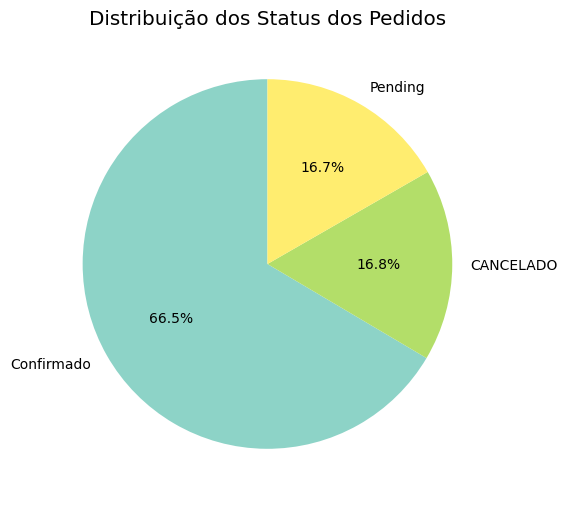

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
status_dist.plot(kind="pie", autopct="%1.1f%%", startangle=90, cmap="Set3")
plt.ylabel("")
plt.title("Distribuição dos Status dos Pedidos")
plt.show()


### 📈 Evolução do Ticket Médio Mensal

Este gráfico mostra a variação do valor médio dos pedidos ao longo dos meses, permitindo identificar tendências ou sazonalidades.


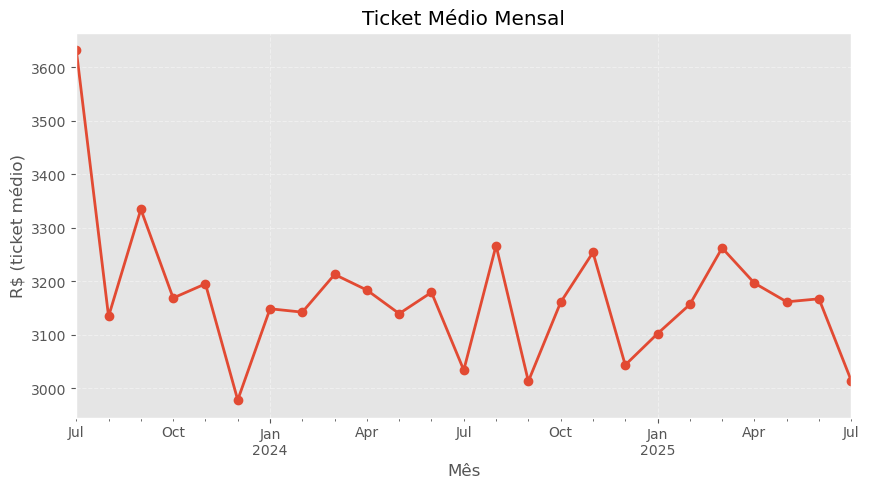

In [24]:
plt.figure(figsize=(10,5))
ticket_mensal.plot(marker="o", linewidth=2)
plt.title("Ticket Médio Mensal")
plt.ylabel("R$ (ticket médio)")
plt.xlabel("Mês")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

### 🗺️ Receita Total — Top Estados

Aqui analisamos os 10 estados com maior volume financeiro.  
Esse gráfico evidencia regiões prioritárias para estratégias comerciais.


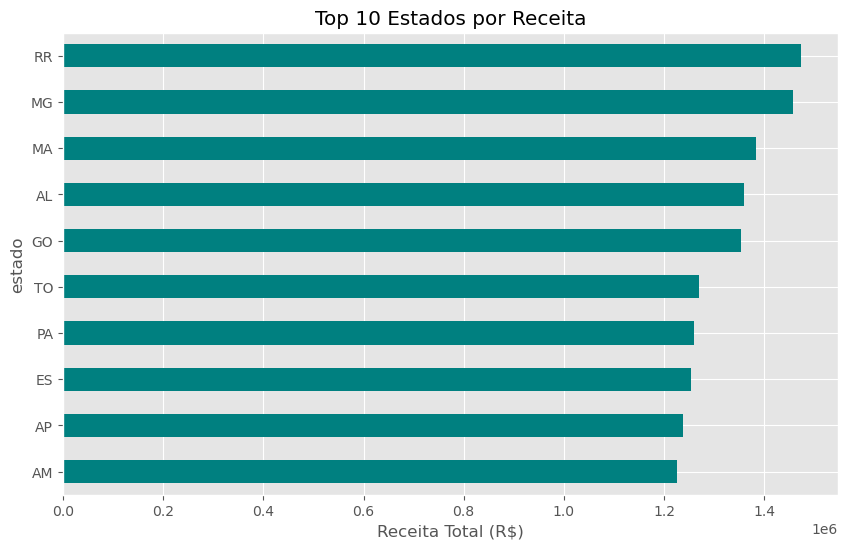

In [25]:
top_estados = receita_estado.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_estados.plot(kind="barh", color="teal")
plt.gca().invert_yaxis()
plt.title("Top 10 Estados por Receita")
plt.xlabel("Receita Total (R$)")
plt.show()

### 🏙️ Receita Total — Top Cidades

Visualizamos as cidades com maior valor vendido.  
É útil para identificar polos urbanos de alto impacto.

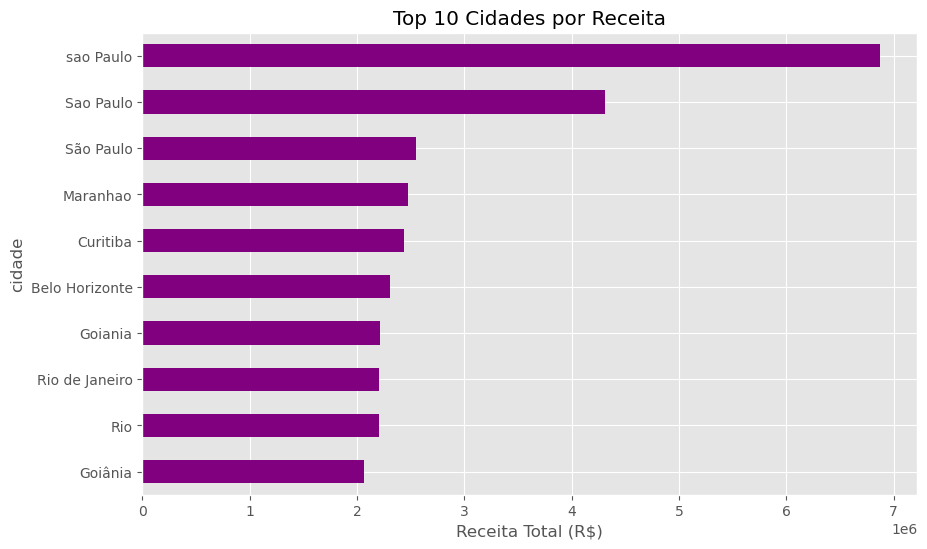

In [26]:
top_cidades = ranking_cidades.head(10)

plt.figure(figsize=(10,6))
top_cidades.plot(kind="barh", color="purple")
plt.gca().invert_yaxis()
plt.title("Top 10 Cidades por Receita")
plt.xlabel("Receita Total (R$)")
plt.show()

### 📦 Top 10 Produtos Mais Vendidos

Este gráfico mostra os produtos com maior número total de itens vendidos, ajudando a entender a distribuição da demanda.


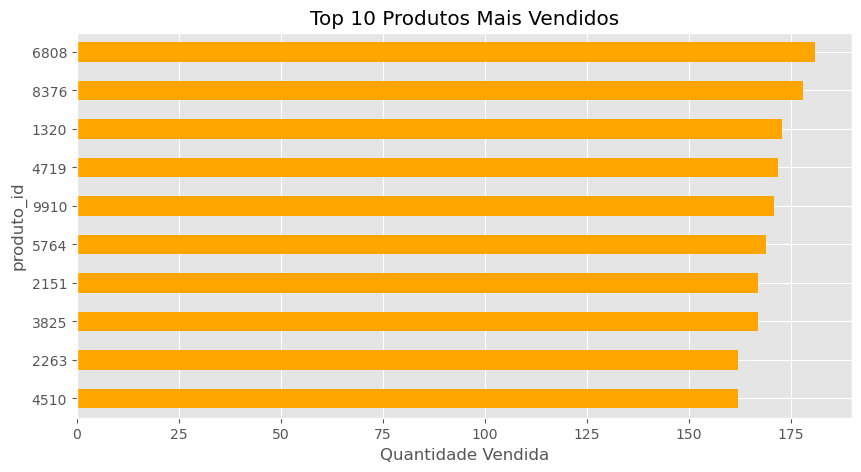

In [27]:
plt.figure(figsize=(10,5))
top_produtos.sort_values().plot(kind="barh", color="orange")
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.show()